In [7]:
from tensorflow.keras.utils import get_file
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.metrics import silhouette_score

In [8]:
names = [
"edibility",
"cap-shape",
"cap-surface",
"cap-color",
"bruises?",
"odor",
"gill-attachment",
"gill-spacing",
"gill-size",
"gill-color",
"stalk-shape",
"stalk-root",
"stalk-surface-above-ring",
"stalk-surface-below-ring",
"stalk-color-above-ring",
"stalk-color-below-ring",
"veil-type",
"veil-color",
"ring-number",
"ring-type",
"spore-print-color",
"population",
"habitat"]
dataset = pd.read_csv(get_file("mushrooms_data.csv", "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"), names=names)
dataset.head()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
temp_y, temp_X = dataset['edibility'], dataset.drop('edibility', axis='columns')
print("temp edibility shape:", temp_y.shape)
print("temp rest shape:", temp_X.shape)

data_X, data_y = pd.get_dummies(temp_X), pd.get_dummies(temp_y)
print("edibility shape:", data_y.shape)
print("rest shape:", data_X.shape)

temp edibility shape: (8124,)
temp rest shape: (8124, 22)
edibility shape: (8124, 2)
rest shape: (8124, 117)


In [10]:
pca = decomposition.PCA(n_components=2)
pca.fit(data_X)
X = pca.transform(data_X)

* Using the UCI Mushroom dataset, use the k-means and a suitable cluster evaluation evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible)

2...3...4...5...6...7...8...9...10...11...

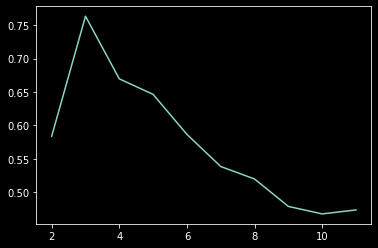

In [11]:
def kmeans_score(nr_components):
    print(nr_components, end='...')
    return silhouette_score(X, KMeans(n_clusters=nr_components).fit_predict(X))

components_to_check = range(2,12)
res = list(map(kmeans_score, components_to_check))
plt.plot(components_to_check, res)

In [16]:
best_nr_clusters = max(zip(components_to_check, res), key=lambda x: x[1])
print("{} clusters gave the best score: {}".format(best_nr_clusters[0], best_nr_clusters[1]))

3 clusters gave the best score: 0.7632728004303597


(3, 2)


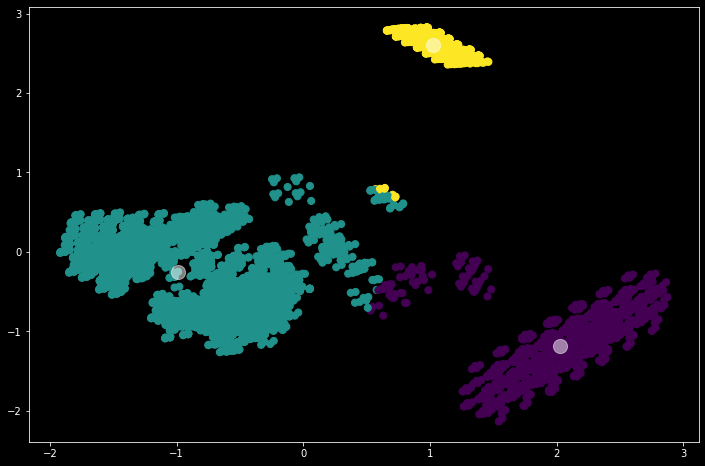

In [17]:
kmeans = KMeans(n_clusters=best_nr_clusters[0])
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
print(centers.shape)
plt.scatter(centers[:, 0], centers[:, 1], c='white', s=200, alpha=0.5)